Huy Ngo - Section C

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 4
Due 11/4/2024 by 5p

### Problem 1
Write a function ```greaterThan(A, lower_lim)``` that takes as an argument a numpy array A and a number lower_lim and returns an array with every entry less than or equal to lower_lim replaced by zero. That is to say, only the numbers strictly greater than lower_lim remain, the rest are 0.

In [14]:
'''your code here'''
import numpy as np

def greaterThan(A, lower_lim):
    result = np.copy(A)
    result[result <= lower_lim] = 0
    return result


In [15]:
A = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
B = np.array([[-1, 1], [2, -2], [0, 3]])
C = np.array([[101.1, 100, 99.9], [99.8, 100.1, 98.9], [103.2, 99, 98]])

assert np.all(greaterThan(A, 5) == np.array([0, 0, 0, 0, 0, 6, 7, 8, 9]))
assert np.all(greaterThan(B, 0) == np.array([[0, 1], [2, 0], [0, 3]]))
assert np.all(greaterThan(C, 100) == np.array([[101.1, 0, 0], [0, 100.1, 0], [103.2, 0, 0]]))

print("You passed all the tests!")

You passed all the tests!


### Problem 2
Write a function ```subtractMean(A)``` that takes as an input the numpy array and returns the array with the mean of all the values subtracted from every element.

In [16]:
'''your code here'''
def subtractMean(A):
    mean_value = np.mean(A)
    result = A - mean_value
    return result

If the tests below aren't passing, check the values of A, B, and C. These should be the same as in the test for Problem 1. If the values in these arrays have changed, why might that be?

In [17]:
assert np.isclose(subtractMean(A), np.array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])).all()
assert np.isclose(subtractMean(B), np.array([[-1.5,  0.5],[ 1.5, -2.5],[-0.5,  2.5]])).all()
assert np.isclose(subtractMean(C), np.array([[ 1.1,  0. , -0.1],[-0.2,  0.1, -1.1],[ 3.2, -1. , -2. ]])).all()

print("You passed all the tests!")


You passed all the tests!


### Problem 3

Write a function ```arrayEdges``` that takes as an input an array and returns a 1-D array of all the elements on the edges of the array starting at the upper left corner and working around clockwise. Do not repeat that first element. If the original array is not 2-D, print('Error') and return -1.

*Hint*: Get the shape of the array as height and width, calculate the perimeter (remember not to double count the corners), and make an array of zeros the size of the perimeter. Then fill that array.

*Hint 2*: The length of the shape of a 2-D array is 2.

*Hint 3*: ```dA = A.dtype``` is the data type of A. ```np.zeros().astype(dA)``` creates an array of that type (if A has strings, this will make an array of '0').

In [18]:
def arrayEdges(A):
    if A.ndim != 2:
        print('Error')
        return -1
    
    height, width = A.shape
    
    if height == 1:
        return A[0]
    if width == 1:
        return A.flatten()
    
    edge_elements = []
    
    edge_elements.extend(A[0, :])
    
    edge_elements.extend(A[1:, -1])
    
    edge_elements.extend(A[-1, -2::-1])
    
    if height > 2:
        edge_elements.extend(A[-2:0:-1, 0])
    
    return np.array(edge_elements)

In [19]:
'''Test your code'''

X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
Y = np.array([['you', 'got', 'this'],['!','correct','problem']])
Z = np.array(['but','this','wont', 'work'])

assert np.array(arrayEdges(X) == np.array([1, 2, 3, 6, 9, 8, 7, 4])).all()
assert np.array(arrayEdges(Y) == np.array(['you', 'got', 'this', 'problem', 'correct', '!'])).all()
assert arrayEdges(Z) == -1

print("You passed all the tests! (disregard that it says Error above...it's supposed to do that)")


Error
You passed all the tests! (disregard that it says Error above...it's supposed to do that)


## Palmer's Penguins

Below I've imported the Palmer's Penguins dataset, courtesy of Alison Horst's github. Fill in the blanks in Problem 4. You should add code cells below to write code to find the answers.

In [20]:
import pandas as pd

pp_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv')
pp_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


### Problem 4

 1. How many penguins were recorded? 

  - There are 333 penguins with complete measurements recorded.

 2. In terms of body mass, how big were the smallest and biggest penguins measured?

  - Smallest: 2700g
  - Largest: 6300g

 3. What species of penguins were recorded and how many of each?

 - Adelie:       152
 - Gentoo:       124
 - Chinstrap:     68

In [21]:
num_penguins = pp_df.dropna().shape[0]
print(f"Number of penguins with complete records: {num_penguins}")

min_mass = pp_df['body_mass_g'].min()
max_mass = pp_df['body_mass_g'].max()
print(f"Smallest penguin: {min_mass}g")
print(f"Largest penguin: {max_mass}g")

species_counts = pp_df['species'].value_counts()
print("\nNumber of penguins by species:")
print(species_counts)

Number of penguins with complete records: 333
Smallest penguin: 2700.0g
Largest penguin: 6300.0g

Number of penguins by species:
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


### Problem 5

Plot a histogram of the body masses of penguins grouped by species. Make sure to include a title, axis labels, and a legend.

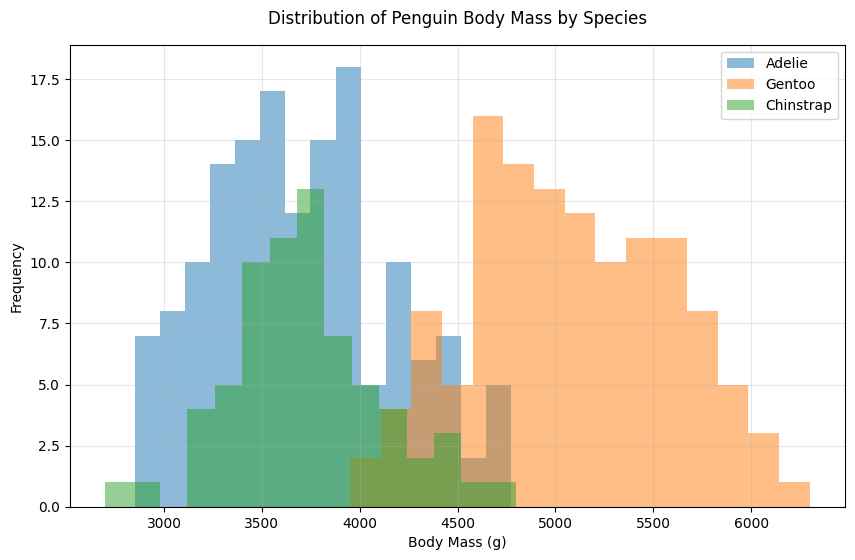

In [22]:
'''your code here'''
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for species in pp_df['species'].unique():
    species_data = pp_df[pp_df['species'] == species]['body_mass_g']
    plt.hist(species_data, bins=15, alpha=0.5, label=species)

plt.title('Distribution of Penguin Body Mass by Species', fontsize=12, pad=15)
plt.xlabel('Body Mass (g)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.legend()

plt.grid(True, alpha=0.3)

plt.show()

### Challenge Problem

Write a function ```interleaveArrays``` that takes as arguments two numpy arrays A and B and return a new numpy array with the rows of A and B interleaved, starting with A. If you run out of rows from one matrix or the other complete the array with the remaining rows of the longer array.

If the two arrays do not have the same number of columns, print('Error: Shapes of arrays are not compatible.') and return -1
If the two arrays contain different data types, print('Error: Types of arrays are not compatible.') and return -2

Example:

```
G = np.array([[1, 2, 3], [4, 5, 6]])
H = np.array([[10, 20, 30], [100, 200, 300], [1000, 2000, 3000]])

interleave(G,H)
```
returns
```
array([[1,2,3], [10,20,30], [4, 5, 6], [100, 200, 300], [1000, 2000, 3000]])
```

In [23]:
'''your code here'''
def interleave(A, B):
    if A.shape[1] != B.shape[1]:
        print('Error: Shapes of arrays are not compatible.')
        return -1
    
    if A.dtype != B.dtype:
        print('Error: Types of arrays are not compatible.')
        return -1
    
    rows_A = A.shape[0]
    rows_B = B.shape[0]
    
    total_rows = rows_A + rows_B
    
    result = np.zeros((total_rows, A.shape[1]), dtype=A.dtype)
    
    pos = 0
    
    for i in range(max(rows_A, rows_B)):
        if i < rows_A:
            result[pos] = A[i]
            pos += 1
            
        if i < rows_B:
            result[pos] = B[i]
            pos += 1
    
    return result


In [24]:
G = np.array([[1, 2, 3], [4, 5, 6]])
H = np.array([[10, 20, 30], [100, 200, 300], [1000, 2000, 3000]])

assert np.array((interleave(G, H) == np.array([[1,2,3], [10,20,30], [4, 5, 6], [100, 200, 300], [1000, 2000, 3000]]))).all()

print("You passed all the tests!")

You passed all the tests!


In [32]:
import numpy as np
import pandas as pd

# Data (Apparent Magnitude for Globular Clusters)
data = {
    'Galactic Longitude (°)': [
        353.57, 282.19, 7.9, 7.73, 28.09, 5.54, 52.1, 1.53, 307.35, 53.38, 332.96,
        328.41, 328.77, 56.74, 5.76, 342.14, 20.3, 227.23, 27.18, 357.56, 130.07, 3.86,
        20.8, 337.02, 0.85, 252.85, 346.9, 87.1, 19.23, 14.1
    ],
    'Galactic Latitude (°)': [
        7.32, -11.25, -7.15, 3.8, 16.23, 10.7, -18.89, -11.38, -20.47, -35.78, 79.76,
        4.34, -2.79, -4.56, -24.56, -16.41, -25.75, -29.35, -46.83, 0.99, 19.03, 46.8,
        6.78, 13.27, 45.86, 77.19, -12.57, -42.7, 6.76, -6.8
    ],
    'Apparent Magnitude (m)': [
        14.94, 15.66, 15.66, 15.37, 17.33, 15.24, 16.73, 15.77, 17.13, 16.05, 17.00, 
        16.72, 15.04, 13.76, 17.82, 16.39, 17.33, 16.30, 15.27, 14.49, 15.94, 15.13, 
        15.37, 15.84, 17.58, 17.18, 17.43, 17.81, 15.92, 16.30
    ]
}

df = pd.DataFrame(data)

# Assume average absolute magnitude for RR Lyrae stars
M_rr_lyrae = 0.75

# Calculate distance in parsecs (d) using the distance modulus formula:
# d = 10^((m - M + 5) / 5)
df['Distance (pc)'] = 10 ** ((df['Apparent Magnitude (m)'] - M_rr_lyrae + 5) / 5)

# Convert distance from parsecs to kiloparsecs
df['Distance (kpc)'] = df['Distance (pc)'] / 1000

# Calculate RR Lyrae Average Absolute Magnitude (M) using the distance modulus formula:
# M = m - 5 log10(d) + 5
df['Absolute Magnitude (M)'] = df['Apparent Magnitude (m)'] - 5 * np.log10(df['Distance (pc)']) + 5

# Display each column as a separate table

# Galactic Longitude (°)
print("Galactic Longitude (°):")
print(df['Galactic Longitude (°)'].to_string(index=False))
print("\n")

# Galactic Latitude (°)
print("Galactic Latitude (°):")
print(df['Galactic Latitude (°)'].to_string(index=False))
print("\n")

# Apparent Magnitude (m)
print("Apparent Magnitude (m):")
print(df['Apparent Magnitude (m)'].to_string(index=False))
print("\n")

# Absolute Magnitude (M)
print("Absolute Magnitude (M):")
print(df['Absolute Magnitude (M)'].to_string(index=False))
print("\n")

# Distance (kpc)
print("Distance (kpc):")
print(df['Distance (kpc)'].to_string(index=False))


Galactic Longitude (°):
353.57
282.19
  7.90
  7.73
 28.09
  5.54
 52.10
  1.53
307.35
 53.38
332.96
328.41
328.77
 56.74
  5.76
342.14
 20.30
227.23
 27.18
357.56
130.07
  3.86
 20.80
337.02
  0.85
252.85
346.90
 87.10
 19.23
 14.10


Galactic Latitude (°):
  7.32
-11.25
 -7.15
  3.80
 16.23
 10.70
-18.89
-11.38
-20.47
-35.78
 79.76
  4.34
 -2.79
 -4.56
-24.56
-16.41
-25.75
-29.35
-46.83
  0.99
 19.03
 46.80
  6.78
 13.27
 45.86
 77.19
-12.57
-42.70
  6.76
 -6.80


Apparent Magnitude (m):
14.94
15.66
15.66
15.37
17.33
15.24
16.73
15.77
17.13
16.05
17.00
16.72
15.04
13.76
17.82
16.39
17.33
16.30
15.27
14.49
15.94
15.13
15.37
15.84
17.58
17.18
17.43
17.81
15.92
16.30


Absolute Magnitude (M):
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75


Distance (kpc):
 6.886523
 9.594006
 9.594006
 8.394600
20.701413
 7.906786
15.703628
10.092529
18.879913
11.481536
17.782794
15.631476
 7.211075
 

In [37]:
cal = 7.52
real = 7.97
print(((cal - real) / real) * 100)

-5.646173149309915


In [39]:
import numpy as np

def calculate_distance_and_magnitude(cepheid_period, apparent_magnitude):
    absolute_magnitude = -2.81 * np.log10(cepheid_period) - 1.34
    
    distance_pc = 10 * 10**((apparent_magnitude - absolute_magnitude + 5) / 5)
    
    distance_kpc = distance_pc / 1000
    
    return absolute_magnitude, distance_kpc

cepheid_period_ncg1365 = 35.2  # in days
apparent_magnitude_ncg1365 = 25.5  # in magnitude

# Call the function to calculate M and distance
M, distance_kpc = calculate_distance_and_magnitude(cepheid_period_ncg1365, apparent_magnitude_ncg1365)

print(f"NGC 1365 - Absolute Magnitude (M): {M:.2f}")
print(f"NGC 1365 - Distance (kpc): {distance_kpc:.0f}")


NGC 1365 - Absolute Magnitude (M): -5.69
NGC 1365 - Distance (kpc): 172646


In [48]:
M = -2.81 * np.log10(42.6) - 1.34
m = 24.5

print(M)

0.01 * pow(1.585, m - M) 

-5.91864097347864


12151.179698020602

In [51]:
def ptkp(pixels):
    """
    Convert pixels to kilopixels (kpx).
    
    Parameters:
    pixels (int or float): The number of pixels to convert.
    
    Returns:
    float: The equivalent number of kilopixels.
    """
    return pixels / 1000

ptkp(1141.426)

def atd(arcminutes):
    """
    Convert arcminutes to degrees.
    
    Parameters:
    arcminutes (int or float): The number of arcminutes to convert.
    
    Returns:
    float: The equivalent number of degrees.
    """
    return arcminutes / 60

atd(7.5802)

0.12633666666666665

In [ ]:
import math

def calculate_diameter(distance, angle):
    """
    Calculate the diameter of an object from its angular size and distance.

    Parameters:
    distance (float): The distance to the object (in the same units as the desired diameter, e.g., kpc, light years).
    angle (float): The angular size of the object (in degrees).

    Returns:
    float: The diameter of the object (in the same units as distance).
    """
    # Calculate the diameter using the formula
    diameter = 2 * math.pi * distance * (angle / 360)
    return diameter
